<a href="https://colab.research.google.com/github/g28-kaggle/hello-world/blob/master/XGBOOST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# XGBOOST
import pandas as pd 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.preprocessing  import LabelEncoder 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error 
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
import pandas as pd
from sklearn import datasets, linear_model

%matplotlib inline

filepath='/content/drive/My Drive/house-prices-advanced-regression-techniques/train.csv'

features=['OverallQual','KitchenQual','YearBuilt','YearRemodAdd','1stFlrSF','GrLivArea','TotRmsAbvGrd','BsmtFullBath','GarageArea','GarageCars']

test_data_path ='/content/drive/My Drive/house-prices-advanced-regression-techniques/test.csv' 

test=pd.read_csv(test_data_path)
data=pd.read_csv(filepath)

number=LabelEncoder()



print("NORMAL DATA ")
print(data) 


s = (data.dtypes == 'object')
object_cols = list(s[s].index)



def fct(data):
  my_imputer = SimpleImputer(strategy='constant', fill_value=0)  
  imputed_trainDf = pd.DataFrame(my_imputer.fit_transform(data))

  imputed_trainDf.columns = data.columns

  labelEncoder = LabelEncoder()

  label_train = imputed_trainDf.copy()
  for i in object_cols:
    label_train[i] = labelEncoder.fit_transform(imputed_trainDf[i].astype('str'))

  label_train['LotFrontage']=label_train['LotFrontage'].fillna(label_train['LotFrontage'].mean())
  label_train.drop(['Alley'],axis=1,inplace=True)
  label_train['BsmtCond']=label_train['BsmtCond'].fillna(label_train['BsmtCond'].mode()[0])
  label_train['BsmtQual']=label_train['BsmtQual'].fillna(label_train['BsmtQual'].mode()[0])
  label_train['FireplaceQu']=label_train['FireplaceQu'].fillna(label_train['FireplaceQu'].mode()[0])
  label_train['GarageType']=label_train['GarageType'].fillna(label_train['GarageType'].mode()[0])
  label_train.drop(['GarageYrBlt'],axis=1,inplace=True)
  label_train['GarageFinish']=label_train['GarageFinish'].fillna(label_train['GarageFinish'].mode()[0])
  label_train['GarageQual']=label_train['GarageQual'].fillna(label_train['GarageQual'].mode()[0])
  label_train['GarageCond']=label_train['GarageCond'].fillna(label_train['GarageCond'].mode()[0])
  label_train.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
  label_train['MasVnrType']=label_train['MasVnrType'].fillna(label_train['MasVnrType'].mode()[0])
  label_train['MasVnrArea']=label_train['MasVnrArea'].fillna(label_train['MasVnrArea'].mode()[0])
  label_train['Utilities']=label_train['Utilities'].fillna(label_train['Utilities'].mode()[0])
  label_train['Exterior1st']=label_train['Exterior1st'].fillna(label_train['Exterior1st'].mode()[0])
  label_train['Exterior2nd']=label_train['Exterior2nd'].fillna(label_train['Exterior2nd'].mode()[0])
  label_train['BsmtFinType1']=label_train['BsmtFinType1'].fillna(label_train['BsmtFinType1'].mode()[0])
  label_train['BsmtFinSF1']=label_train['BsmtFinSF1'].fillna(label_train['BsmtFinSF1'].mean())
  label_train['BsmtFinSF2']=label_train['BsmtFinSF2'].fillna(label_train['BsmtFinSF2'].mean())
  label_train['BsmtUnfSF']=label_train['BsmtUnfSF'].fillna(label_train['BsmtUnfSF'].mean())
  label_train['TotalBsmtSF']=label_train['TotalBsmtSF'].fillna(label_train['TotalBsmtSF'].mean())
  label_train['BsmtFullBath']=label_train['BsmtFullBath'].fillna(label_train['BsmtFullBath'].mode()[0])
  label_train['BsmtHalfBath']=label_train['BsmtHalfBath'].fillna(label_train['BsmtHalfBath'].mode()[0])
  label_train['KitchenQual']=label_train['KitchenQual'].fillna(label_train['KitchenQual'].mode()[0])
  label_train['Functional']=label_train['Functional'].fillna(label_train['Functional'].mode()[0])
  label_train['GarageCars']=label_train['GarageCars'].fillna(label_train['GarageCars'].mean())
  label_train['GarageArea']=label_train['GarageArea'].fillna(label_train['GarageArea'].mean())
  label_train['SaleType']=label_train['SaleType'].fillna(label_train['SaleType'].mode()[0])
  label_train['BsmtExposure']=label_train['BsmtExposure'].fillna(label_train['BsmtExposure'].mode()[0])
  label_train['BsmtFinType2']=label_train['BsmtFinType2'].fillna(label_train['BsmtFinType2'].mode()[0])
  
  return label_train

data=fct(data)
data.fillna(0)
test.fillna(0)
print("DATA WITH LABEL ENCODING")
print(data)
y = data.SalePrice 
X = data[features]
train_X, val_X, train_y, test_y = train_test_split(X.values, y, test_size=0.2,random_state=1)
my_imputer = SimpleImputer() 
train_X = my_imputer.fit_transform(train_X) 
val_X = my_imputer.transform(val_X)

#print (train_X.shape, train_y.shape)
#print (val_X.shape, test_y.shape)


#Add silent=True to avoid printing out updates with each cycle
my_model = XGBRegressor()
my_model = XGBRegressor(n_estimators=2000,learning_rate=0.05,silent=True) 
my_model.fit(train_X, train_y, early_stopping_rounds=5, eval_set=[(val_X, test_y)], verbose=False) 
predictions = my_model.predict(val_X)


#print(test_X)

print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_y)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, predictions))) 

a=pd.read_csv(test_data_path) 
test=pd.read_csv(test_data_path)
test=fct(test)
test_X = test[features]
test_X = np.nan_to_num(test_X)

predictions = my_model.predict(test_X)

output = pd.DataFrame({'Id': test.Id,
                       'SalePrice': predictions})
output.to_csv('test2-submission.csv', index=False)



NORMAL DATA 
        Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0        1          60       RL  ...        WD         Normal    208500
1        2          20       RL  ...        WD         Normal    181500
2        3          60       RL  ...        WD         Normal    223500
3        4          70       RL  ...        WD        Abnorml    140000
4        5          60       RL  ...        WD         Normal    250000
...    ...         ...      ...  ...       ...            ...       ...
1455  1456          60       RL  ...        WD         Normal    175000
1456  1457          20       RL  ...        WD         Normal    210000
1457  1458          70       RL  ...        WD         Normal    266500
1458  1459          20       RL  ...        WD         Normal    142125
1459  1460          20       RL  ...        WD         Normal    147500

[1460 rows x 81 columns]
DATA WITH LABEL ENCODING
        Id MSSubClass  MSZoning  ...  SaleType SaleCondition  SalePrice


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


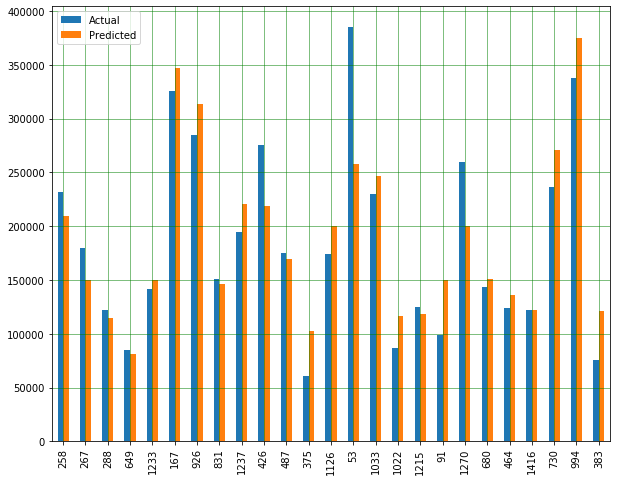

Mean Absolute Error: 20939.393864644488
Root Mean Squared Error: 31089.322695769788


In [4]:
# RANDOM FOREST

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
# %matplotlib inline


filepath='/content/drive/My Drive/house-prices-advanced-regression-techniques/train.csv'
data=pd.read_csv(filepath)
data = pd.get_dummies(data)
corrmat = data.corr()
corr_train = data

for col_name in corrmat.columns:
  if corrmat['SalePrice'][col_name] < 0.5:
    corr_train = corr_train.drop(columns=col_name)

corr_train = corr_train.drop(columns='BsmtQual_Ex')
corr_train = corr_train.drop(columns='KitchenQual_Ex')

a=corr_train.corr()
#print(a['SalePrice'])

features=['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','FullBath','GrLivArea','TotRmsAbvGrd','GarageCars','GarageArea']


number=LabelEncoder()

data['OverallQual'] = number.fit_transform(data['OverallQual'].astype('str'))
data['TotalBsmtSF'] = number.fit_transform(data['TotalBsmtSF'].astype('str'))
data['1stFlrSF'] = number.fit_transform(data['1stFlrSF'].astype('str'))
data['GrLivArea'] = number.fit_transform(data['GrLivArea'].astype('str'))
data['FullBath'] = number.fit_transform(data['FullBath'].astype('str'))
data['GarageCars'] = number.fit_transform(data['GarageCars'].astype('str'))
data['TotRmsAbvGrd'] =number.fit_transform(data['TotRmsAbvGrd'].astype('str'))



data=data.fillna(0)

corr_train['OverallQual'] = number.fit_transform(corr_train['OverallQual'].astype('str'))
corr_train['TotalBsmtSF'] = number.fit_transform(corr_train['TotalBsmtSF'].astype('str'))
corr_train['1stFlrSF'] = number.fit_transform(corr_train['1stFlrSF'].astype('str'))
corr_train['GrLivArea'] = number.fit_transform(corr_train['GrLivArea'].astype('str'))
corr_train['FullBath'] = number.fit_transform(corr_train['FullBath'].astype('str'))
corr_train['GarageCars'] = number.fit_transform(corr_train['GarageCars'].astype('str'))
corr_train['TotRmsAbvGrd'] =number.fit_transform(corr_train['TotRmsAbvGrd'].astype('str'))

corr_train=corr_train.fillna(0)
np.nan_to_num(corr_train)

X = corr_train[features]
y = corr_train.SalePrice
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)

train_model = RandomForestRegressor(random_state=1)
train_model.fit(train_X,train_y)


pred_y = train_model.predict(val_X)

df = pd.DataFrame({'Actual': val_y, 'Predicted': pred_y})
df1 = df.head(25)
#print(df)

df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

print('Mean Absolute Error:', metrics.mean_absolute_error(val_y, pred_y)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(val_y, pred_y)))

test_data_path ='/content/drive/My Drive/house-prices-advanced-regression-techniques/test.csv'

rf_model_on_full_data = RandomForestRegressor(random_state=1)

rf_model_on_full_data.fit(train_X, train_y)

test_data = pd.read_csv(test_data_path)

test_X = test_data[features]
test_X = np.nan_to_num(test_X)
test_X = test_X.astype('int64')

test_preds = rf_model_on_full_data.predict(test_X)

output = pd.DataFrame({'Id': test_data.Id,
                       'SalePrice': test_preds})
output.to_csv('test2-submission.csv', index=False)